<a href="https://colab.research.google.com/github/Maria-mbugua/IPWeek8-Core/blob/main/DECISION_TREES_AND_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DEFINING THE QUESTION**

## **a) Specifying the Question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## **b) Defining the Metrics of success**

Building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## **c) Understanding the context**

Knowing the factor symptoms of hypothroid.

## **d) Recording the Experimental Design**

1. Define the question, the metric for success, the context, experimental design taken.

2. Read and explore the given dataset.

3. Define the appropriateness of the available data to answer the given question.

4. Find and deal with outliers, anomalies, and missing data within the dataset.

5. Perform univariate, bivariate and multivariate analysis recording your observations.

6. Performing regression analysis.

7. Provide a recommendation based on your analysis.

8. Challenge your solution by providing insights on how you can make improvements in model improvement.


## **e) Relevance of the data**

The data used for this project is necessary for building a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

# **2. DATA ANALYSIS**

## **a) Checking the data**

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Reading datasets
df = pd.read_csv('http://bit.ly/hypothyroid_data')

In [5]:
# Previewing the dataset
df.shape

(3163, 26)

In [6]:
# Previewing the top of the dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [7]:
# Previewing the tail of the dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [8]:
# Printing the the number of unique values of the columns
print(df.nunique())

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64


In [9]:
# Previewing the columns of the datasets
df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [10]:
# Replacing values 
df = df.replace({'?' : np.nan})
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,NaN
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,NaN
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,NaN
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,NaN
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,NaN


In [11]:
# Replacing values and variables
df = df.replace({'f' : 0, 't' : 1})
df = df.replace({'n' : 0, 'y' : 1})

In [12]:
# Using apply method 
df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]] =df[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' ]].apply(pd.to_numeric) 
print(df.dtypes) 

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object


In [13]:
df.sample(8)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
2635,negative,28.0,F,1,0,0,0,0,0,0,...,1,3.1,1,163.0,1,1.57,1,104.0,0,NaN
2869,negative,NaN,M,0,0,0,0,0,0,0,...,1,2.1,1,85.0,1,1.01,1,84.0,0,NaN
1854,negative,15.0,M,0,0,0,0,0,1,0,...,0,NaN,0,NaN,0,NaN,0,NaN,1,12.0
451,negative,34.0,F,1,0,0,0,0,0,0,...,0,NaN,1,126.0,1,0.74,1,169.0,0,NaN
2062,negative,51.0,M,0,0,0,0,0,0,0,...,1,1.6,1,73.0,1,1.05,1,70.0,0,NaN
1918,negative,15.0,F,0,0,0,0,0,0,0,...,1,2.6,1,95.0,1,0.82,1,116.0,0,NaN
2843,negative,29.0,F,0,0,0,1,0,0,0,...,1,2.2,1,120.0,1,0.97,1,123.0,0,NaN
729,negative,43.0,F,0,0,0,0,1,0,0,...,0,NaN,1,61.0,1,0.74,1,82.0,0,NaN


In [14]:
# df.dropna()

# droping null values does away with a good section of the dataset leaving a dataset that is dysfunctional and insignificant.
# therefoore the null values in this dataset were not dropped

In [15]:
# Previewing the various datatypes for every column
df.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
TBG_measured                   int64
TBG                          float64
dtype: object

## **b) Data Cleaning**

In [16]:
# Dropping unnecessary columns
df1 = df.drop(['TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'], axis = 1)
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [17]:
# Checking count of null values
df1.isnull().sum()

status                         0
age                          446
sex                           73
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
thyroid_surgery                0
query_hypothyroid              0
query_hyperthyroid             0
pregnant                       0
sick                           0
tumor                          0
lithium                        0
goitre                         0
dtype: int64

In [18]:
# Checking the datatypes
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

In [19]:
# Filling the null values with zeros
df1.fillna(0)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
0,hypothyroid,72.0,M,0,0,0,0,0,0,0,0,0,0,0
1,hypothyroid,15.0,F,1,0,0,0,0,0,0,0,0,0,0
2,hypothyroid,24.0,M,0,0,0,0,0,0,0,0,0,0,0
3,hypothyroid,24.0,F,0,0,0,0,0,0,0,0,0,0,0
4,hypothyroid,77.0,M,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,0,0,0,0,0,0,0,0,0,0,0
3159,negative,29.0,F,0,0,0,0,0,0,0,0,0,0,0
3160,negative,77.0,M,0,0,0,0,0,0,0,0,0,0,0
3161,negative,74.0,F,0,0,0,0,0,0,0,0,0,0,0


In [20]:
# Checking for duplicates
df1.duplicated().any()

True

In [21]:
# Dropping duplicates
df1.drop_duplicates(inplace=True)

In [22]:
# Checking count of duplicate 
df1.duplicated().sum()

0

In [23]:
# Previewing the dataset
df1.shape

(914, 14)

In [24]:
# Previewing the columns
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [25]:
# Describing the numerical features
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# Checking for anomalies

q11 = df1['on_thyroxine'].quantile(.25)
q31 = df1['on_thyroxine'].quantile(.75)

iqr11 = q31 - q11
iqr11

q11, q31 = np.percentile(df1['on_thyroxine'], [25, 75]) 

iqr = q31 - q11

l_bound = q11 - (1.5*iqr)
u_bound = q31 + (1.5 * iqr)

print(iqr11, iqr)

0.0 0.0


In [27]:
# Previewing the columns
df1.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre'],
      dtype='object')

In [28]:
# Previewing the datatypes
df1.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid             int64
pregnant                       int64
sick                           int64
tumor                          int64
lithium                        int64
goitre                         int64
dtype: object

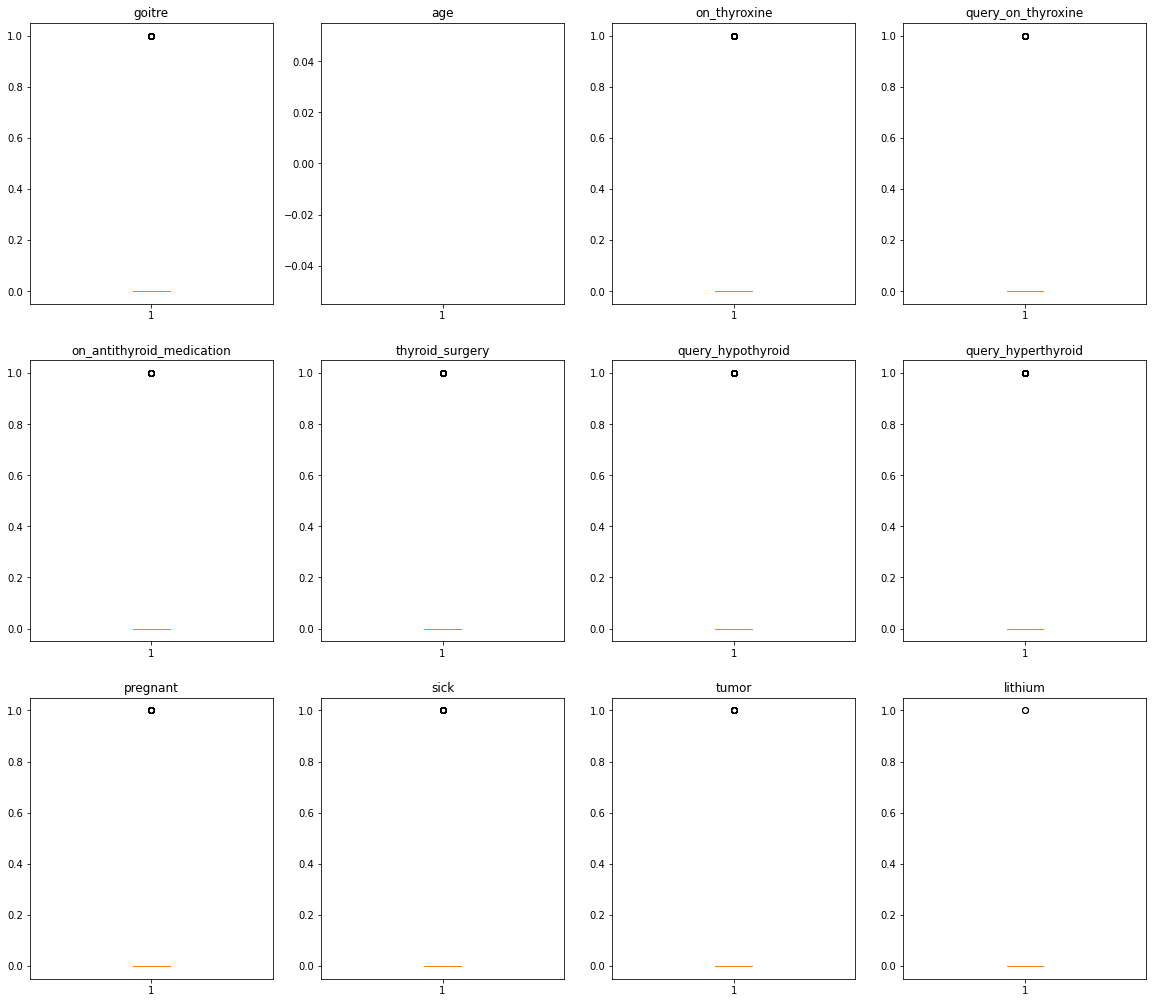

In [31]:
# Checking for outliers
# Saving the column names onto a dictionary
columns_dict = {'goitre': 1, 'age': 2, 'on_thyroxine': 3, 'query_on_thyroxine': 4, 'on_antithyroid_medication': 5, 'thyroid_surgery': 6,
       'query_hypothyroid': 7, 'query_hyperthyroid': 8, 'pregnant': 9, 'sick': 10, 'tumor': 11, 'lithium': 12}

plt.figure(figsize=(20,30))

# Making a boxplot for each numerical column
for variable,i in columns_dict.items():
  plt.subplot(5,4,i)
  plt.boxplot(df1[variable])
  plt.title(variable)

plt.show()

In [33]:
# Dealing with the outliers using quantiles
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
dfx = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(dfx.shape)

# Printing the shape of our old dataset
print(df1.shape)

(226, 14)
(914, 14)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


Since removing the outliers has a great effect on the data, for the exploratory analysis, I will use the initial dataset,the df1.

# **3. EXPLORATORY DATA ANALYSIS**

## **a) Univariate Analysis**

In [37]:
# Removing warnings
import warnings
warnings.filterwarnings('ignore')

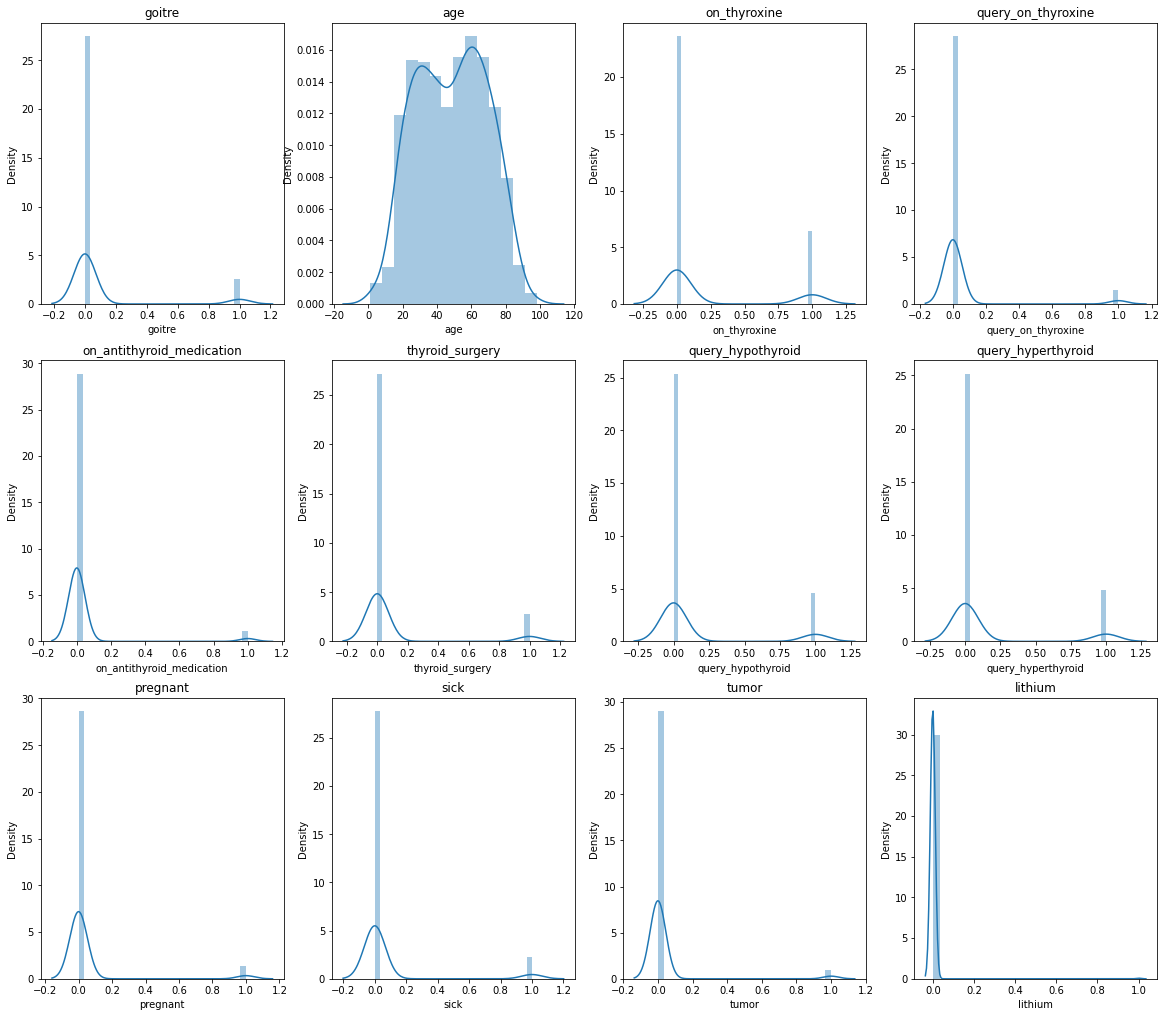

In [38]:
# Ploting the univariate summaries 
# plot histograms for all numeric columns
# We use the dictionary we had earlier on saved
plt.figure(figsize = (20,30))
for variable,i in columns_dict.items():
  
  plt.subplot(5,4,i)
  sns.distplot(df1[variable])
  plt.title(variable)

plt.show()

# this shows the relationship between the variables

In [39]:
# Describing the statistical features of the data
df1.describe()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
count,873.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000,914.000000
mean,48.325315,0.213348,0.049234,0.037199,0.094092,0.154267,0.160832,0.044858,0.074398,0.032823,0.002188,0.084245
std,20.374465,0.409896,0.216475,0.189353,0.292116,0.361402,0.367577,0.207105,0.262562,0.178270,0.046752,0.277907
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **b) Bivariate Analysis**

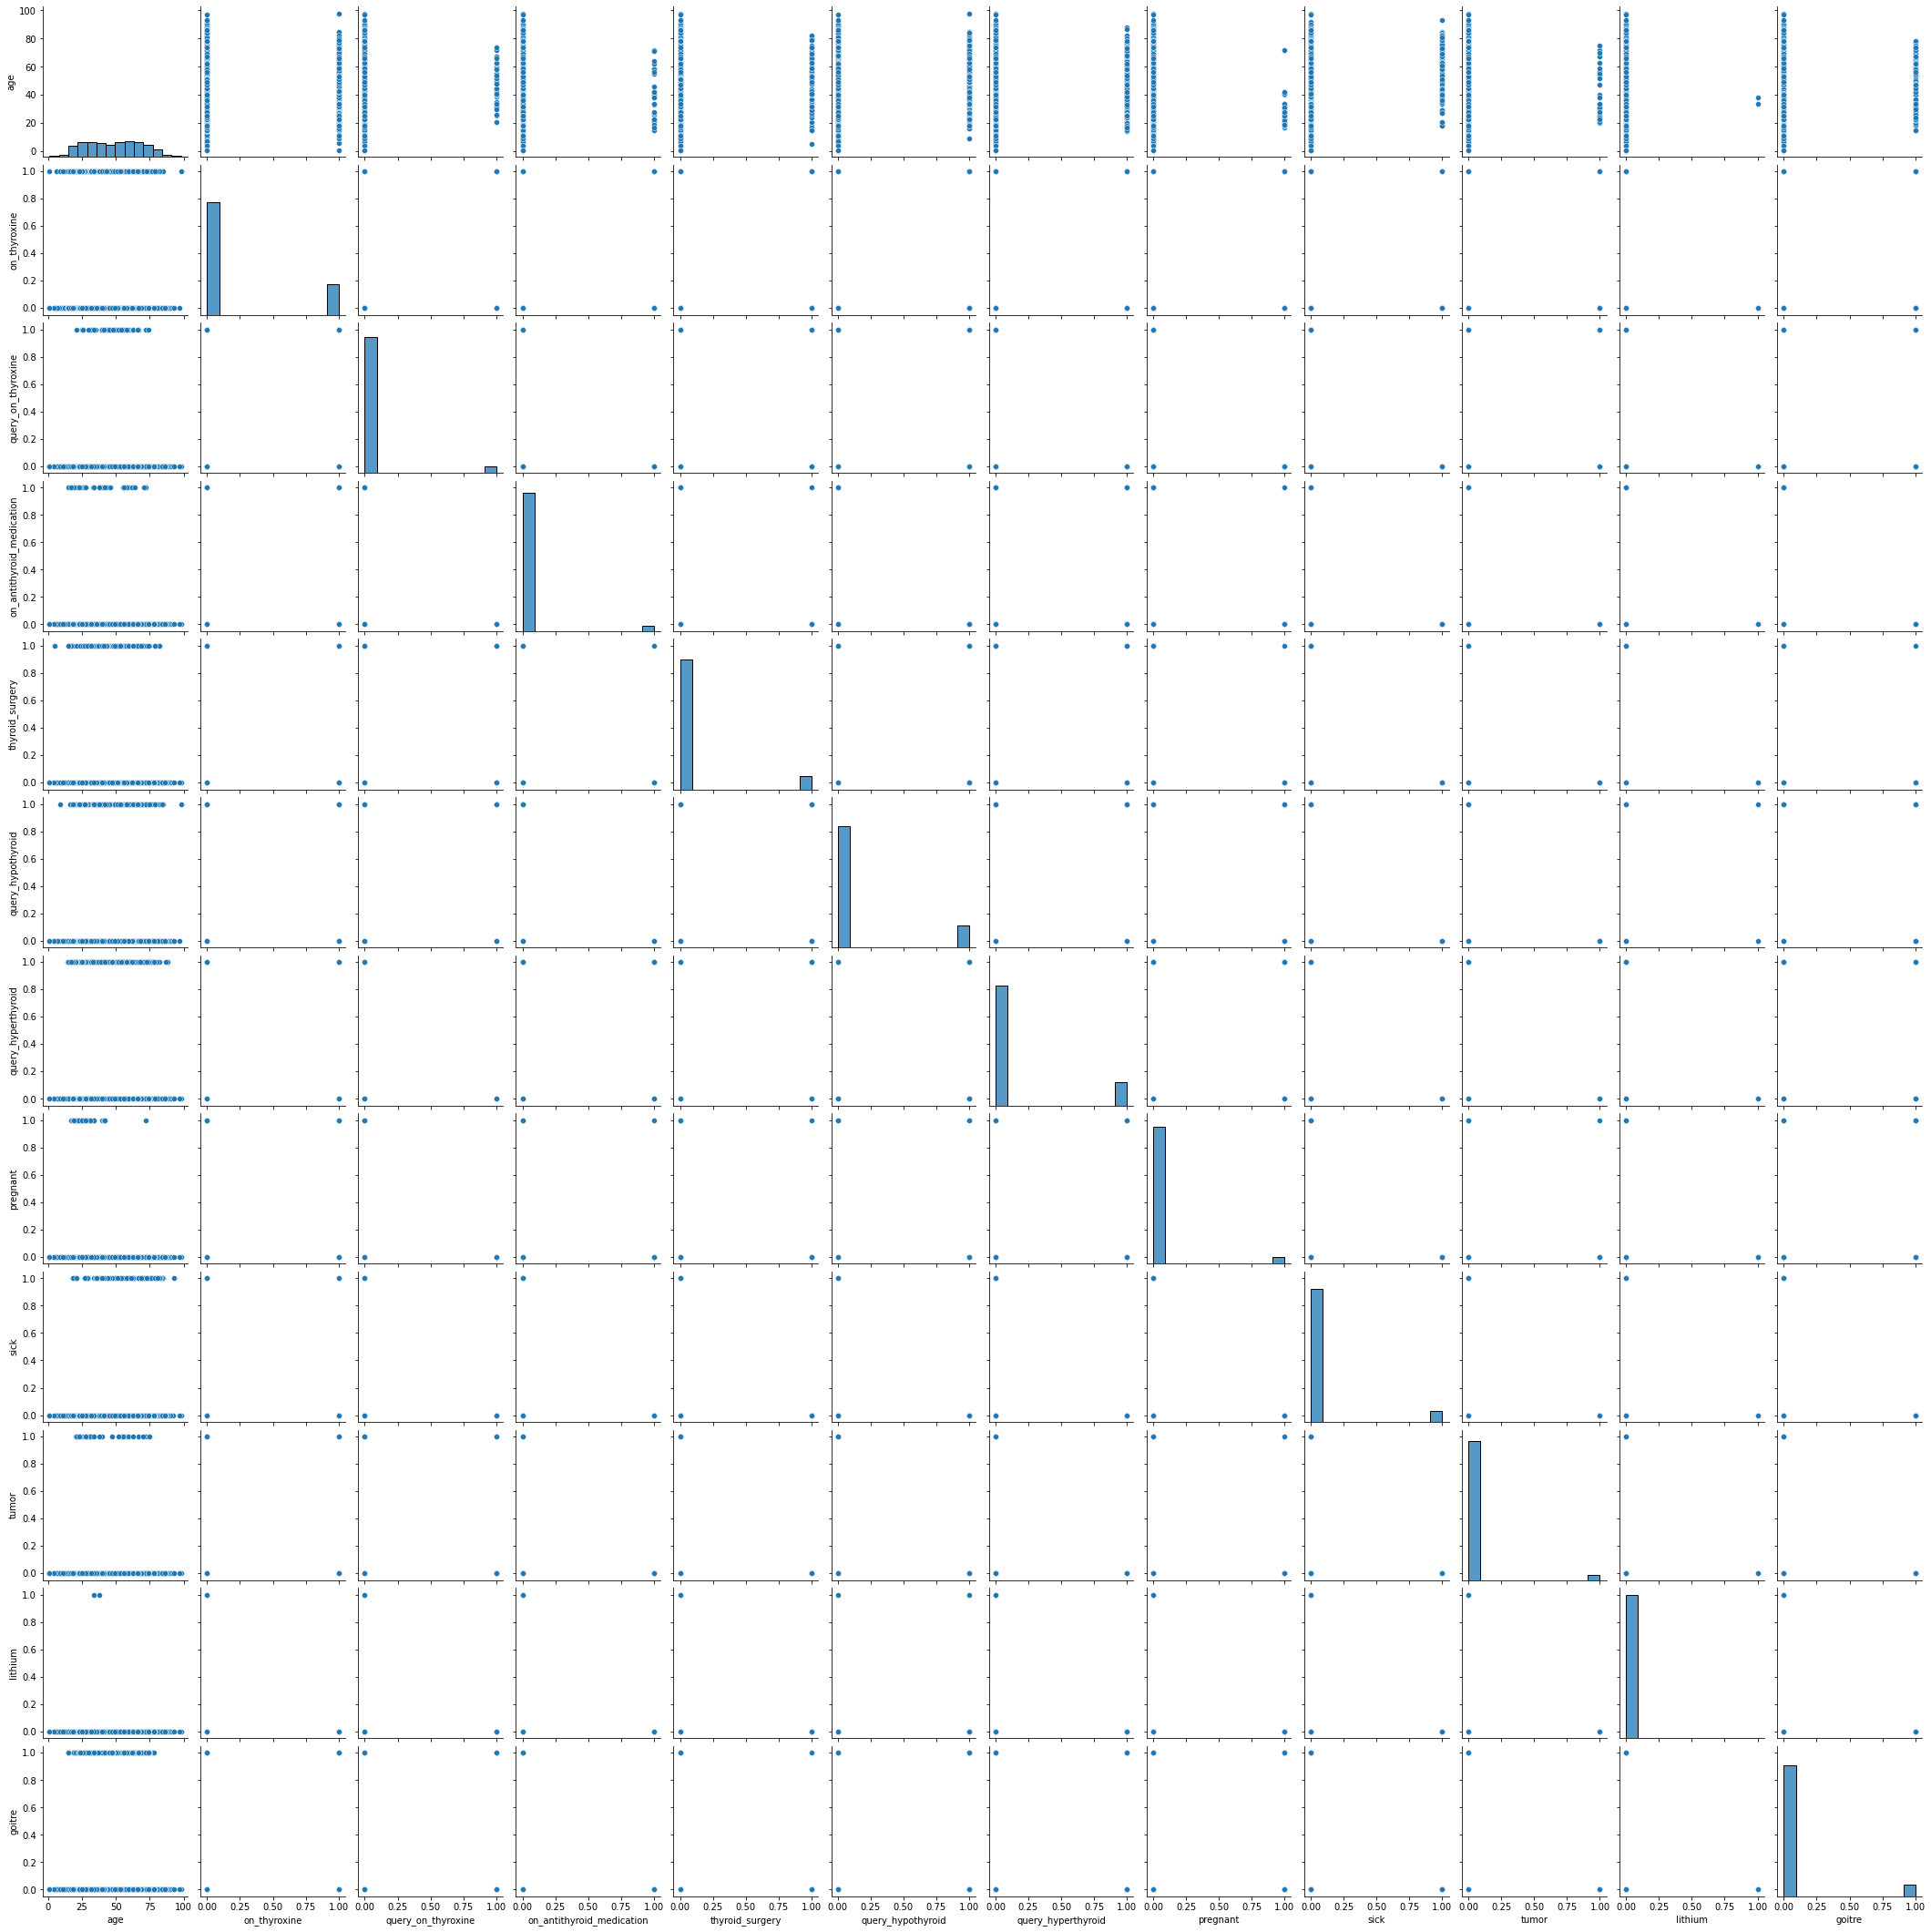

In [40]:
# Ploting the bivariate summaries and recording our observations
# Scatterplot
sns.pairplot(df1)
plt.show()

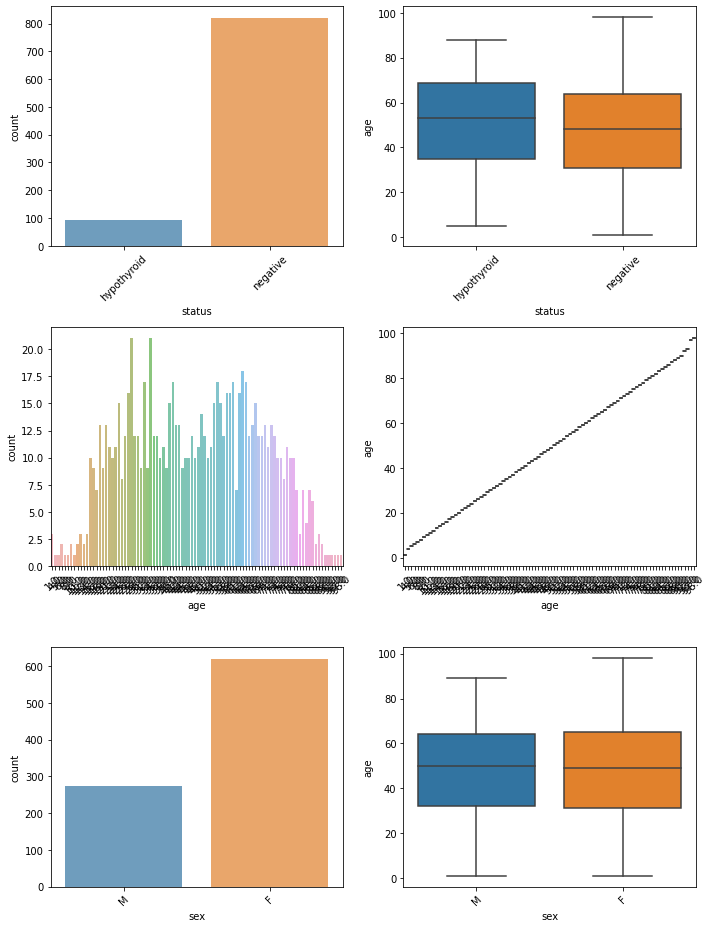

In [41]:
# Categoric Feature Analysis
# Boxplot gives a good idea about how the age is distributed across the categories.
# Distribution charts show how well each category is populated.
c = 0
len_c = 3 # (len(df1.columns)-2)
fig, axes = plt.subplots(len_c, 2, figsize=(10, 13))     # fig height = 70 -> in figsize(width,height)
for i, ax in enumerate(fig.axes):
    if (c < len_c) & (i % 2 == 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df1.columns[c], alpha=0.7, data=df1, ax=ax)

    if (c < len_c) & (i % 2 != 0):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(data = df1, x=df1.columns[c], y='age', ax=ax)
        c = c + 1
fig.tight_layout()

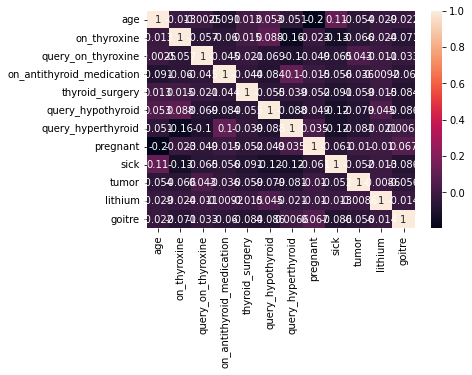

In [42]:
# Plotting the correlation using a heatmap
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [43]:
# Tabulating the correlation coefficients
corr = df1.corr()
corr

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre
age,1.000000,-0.012807,-0.002483,-0.090608,0.012864,0.052702,-0.050616,-0.199151,0.108849,-0.053991,-0.029005,-0.022302
on_thyroxine,-0.012807,1.000000,-0.056790,-0.060029,0.015112,0.088118,-0.162563,-0.022544,-0.127292,-0.065959,-0.024388,-0.071419
query_on_thyroxine,-0.002483,-0.056790,1.000000,-0.044730,-0.021376,-0.069189,-0.099622,-0.049315,-0.064516,0.043225,-0.010656,-0.032608
on_antithyroid_medication,-0.090608,-0.060029,-0.044730,1.000000,-0.043546,-0.083949,0.102787,-0.014668,-0.055727,-0.036210,-0.009205,-0.059618
thyroid_surgery,0.012864,0.015112,-0.021376,-0.043546,1.000000,-0.054644,-0.039084,-0.051738,-0.091370,-0.059370,-0.015092,-0.084258
query_hypothyroid,0.052702,0.088118,-0.069189,-0.083949,-0.054644,1.000000,-0.088034,-0.048656,-0.121085,-0.078678,0.044823,-0.085918
query_hyperthyroid,-0.050616,-0.162563,-0.099622,0.102787,-0.039084,-0.088034,1.000000,0.034615,-0.124117,-0.080648,-0.020501,0.006605
pregnant,-0.199151,-0.022544,-0.049315,-0.014668,-0.051738,-0.048656,0.034615,1.000000,-0.061440,-0.010257,-0.010149,0.067480
sick,0.108849,-0.127292,-0.064516,-0.055727,-0.091370,-0.121085,-0.124117,-0.061440,1.000000,-0.052228,-0.013277,-0.085991
tumor,-0.053991,-0.065959,0.043225,-0.036210,-0.059370,-0.078678,-0.080648,-0.010257,-0.052228,1.000000,-0.008627,-0.055875


## **C) Multivariate Analysis**

### **a) Factor Analysis**

In [44]:
# Performing adequacy tests
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 4.1645423146182944e-27. The test was statistically insignificant, 
# indicating that the observed correlation matrix is an identity matrix.

(316.3276219649896, 4.164542314610364e-27)